<a href="https://colab.research.google.com/github/FlamingoLindo/spotify-svm/blob/VitorFerreira/Spotify_Popularidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação de biblitecas

In [ ]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import permutation_importance

# Versões sendo utilizadas

In [ ]:
print(u'\033[1m\033[4m\033[93m\033[40m')
print('Versão Python: ', sys.version)
print('\nVersão pandas: ', pd.__version__)
print('\nVersão numpy: ', np.__version__)
print('\nVersão seaborn', sns.__version__)
print('\nVersão matplotlib: ', matplotlib.__version__)
print('\nVersão sklearn: ', sklearn.__version__)

# Importação de ferremantas para o envio dos plots diretamente para o discord

In [ ]:
# from utils.get_time import *
# from utils.send_plot_to_disc import *

# Importação do dataset "[🎹 Spotify Tracks Dataset](https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset)"

In [ ]:
file_path = 'https://raw.githubusercontent.com/FlamingoLindo/spotify-svm/main/spotify.csv'
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


# Atualizando o dataframe pra que ele apenas contenha musicas com generos brasileiros

In [ ]:
df = df[(df['track_genre'].isin(['brazil','mpb','pagode','samba','sertanejo']))]

# Verificando se há valores únicos e quais são eles

In [ ]:
colunas = df.columns

for nome_coluna in colunas:
    unique_values = df[nome_coluna].unique()
    unique_qnt = df[nome_coluna].nunique()
    print(f'Valores unícos em {nome_coluna}: {unique_values}')
    print(f'Quantidade de valores unicos {unique_qnt} \n')

Valores unícos em Unnamed: 0: [ 9000  9001  9002 ... 97997 97998 97999]
Quantidade de valores unicos 5000 

Valores unícos em track_id: ['6GomT970rCOkKAyyrwJeZi' '7DFIPUWRKwOB8RWky8ELq8'
 '1JAqy8JxzsmMRq5jD2Oi49' ... '6nYIAevQfh7QhuQYXYLy50'
 '7ALQOUgUrUifvmcGMCyvld' '23iyR47eBWtYZPWReCbAfy']
Quantidade de valores unicos 4317 

Valores unícos em artists: ['Öwnboss;Sevek' 'BK;JXNV$' 'Liu;GenX' ...
 'George Henrique & Rodrigo;Jorge & Mateus'
 'Conrado & Aleksandro;Bruno & Barretto' 'Cezar & Paulinho']
Quantidade de valores unicos 1546 

Valores unícos em album_name: ['Move Your Body' 'Castelos & Ruínas' 'Pirate' ... 'Os Grandes Sucessos'
 'Os Serranos Interpretam Sucessos Gaúchos, Vol. 3' 'Volume 8']
Quantidade de valores unicos 2569 

Valores unícos em track_name: ['Move Your Body' 'Amores, Vícios e Obsessões' 'Pirate' ...
 'Velha Porteira' 'Aqui É Parana Cunhado' 'O Casamento de Doralice']
Quantidade de valores unicos 4064 

Valores unícos em popularity: [82 56 54 57 52 55 53 58  0  1 

# Criando uma cópia do dataframe

In [ ]:
train_df = df.copy()

# Verficação se há algum valor no dataset com NaN, se sim esses valores serão deletados

In [ ]:
train_df.dropna(inplace=True)
train_df.isna().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

# Removendo colunas desnecessárias

In [ ]:
train_df.drop([ 'Unnamed: 0', 'track_id'], axis=1, inplace=True)
train_df.head()

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
9000,Öwnboss;Sevek,Move Your Body,Move Your Body,82,157444,False,0.848,0.821,2,-5.408,0,0.0527,0.01690,0.000403,0.0962,0.249,125.051,4,brazil
9001,BK;JXNV$,Castelos & Ruínas,"Amores, Vícios e Obsessões",56,194478,False,0.833,0.517,11,-7.502,0,0.3010,0.11600,0.000142,0.1160,0.187,129.047,4,brazil
9002,Liu;GenX,Pirate,Pirate,54,221775,False,0.720,0.781,10,-2.647,0,0.0609,0.00408,0.807000,0.3080,0.307,125.005,4,brazil
9003,Yago Oproprio,Helipa,Helipa,57,202213,False,0.692,0.427,11,-10.733,0,0.3910,0.52700,0.000000,0.1700,0.542,75.086,4,brazil
9004,Xamã;Bagua Records;Luccas Carlos,O Iluminado,Uma Linda Mulher,54,208000,True,0.704,0.616,6,-7.042,0,0.0818,0.29900,0.000000,0.0856,0.161,89.974,4,brazil


# Estabelecendo a quantidades de linhas que será usada no dataframe

In [ ]:
# train_df = train_df.sample(100)

# n = 100
# traind_df = df.iloc[:n]
print(len(train_df))

5000


# Utilizando o Label Encoding para transormar colunas categoricas

In [ ]:
le = LabelEncoder()

train_df['artists'] = le.fit_transform(train_df['artists'])

train_df['album_name'] = le.fit_transform(train_df['album_name'])

train_df['track_name'] = le.fit_transform(train_df['track_name'])

train_df['track_genre'] = le.fit_transform(train_df['track_genre'])

train_df.head()

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
9000,1545,1417,2186,82,157444,False,0.848,0.821,2,-5.408,0,0.0527,0.01690,0.000403,0.0962,0.249,125.051,4,0
9001,119,508,314,56,194478,False,0.833,0.517,11,-7.502,0,0.3010,0.11600,0.000142,0.1160,0.187,129.047,4,0
9002,811,1786,2759,54,221775,False,0.720,0.781,10,-2.647,0,0.0609,0.00408,0.807000,0.3080,0.307,125.005,4,0
9003,1502,1077,1679,57,202213,False,0.692,0.427,11,-10.733,0,0.3910,0.52700,0.000000,0.1700,0.542,75.086,4,0
9004,1490,1604,3780,54,208000,True,0.704,0.616,6,-7.042,0,0.0818,0.29900,0.000000,0.0856,0.161,89.974,4,0


# Divisão do dataset em 20/80 utilizando a seed 42

In [ ]:
X = train_df.drop('popularity', axis=1)
y = train_df['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treino inicial

In [ ]:
model = SVC()
model.fit(X_train_scaled, y_train)

SVC()

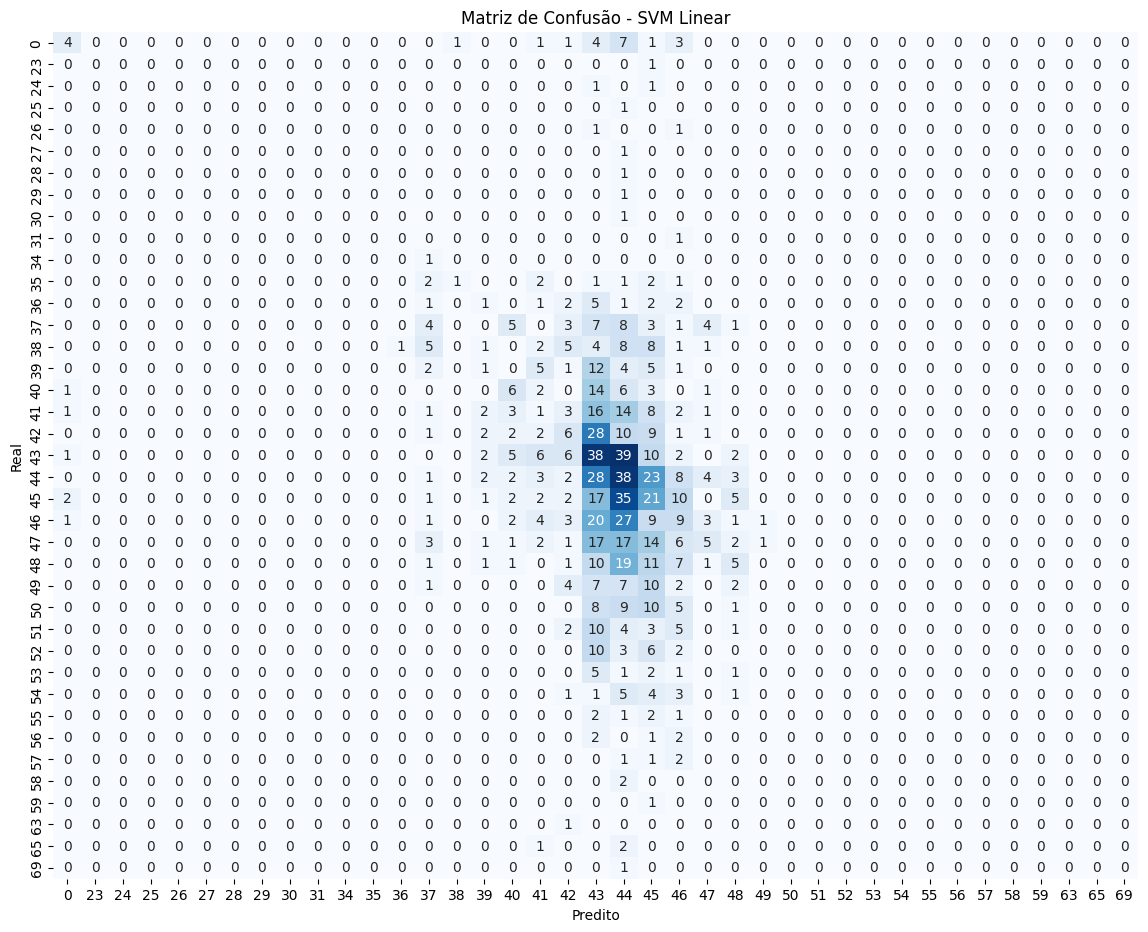

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.40      0.18      0.25        22
          23       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         2
          25       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         2
          27       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         1
          30       0.00      0.00      0.00         1
          31       0.00      0.00      0.00         1
          34       0.00      0.00      0.00         1
          35       0.00      0.00      0.00        10
          36       0.00      0.00      0.00        15
          37       0.16      0.11      0.13        36
          38       0.00      0.00      0.00        36
          39       0.07      0.03      0.04        31
          40       0.21      0.18      0.19        33
          41       0.03    

In [ ]:
# fig1_name = "images/matrix/MATRIX1(POPULARITY)_" + get_date_time_now() + '.png'

y_pred = model.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(14, 11))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Matriz de Confusão - SVM Linear')
plt.xlabel('Predito')
plt.ylabel('Real')
# plt.savefig(fig1_name)
plt.show()
print(classification_report(y_test, y_pred))

# send_plot(webhook_url, fig1_name, 'Matrix de Confusão Popularidade 1 - ' + get_date_time_now())

# Utilizando diferentes valors para atingir a melhor acurácia

In [ ]:
svm = SVC(probability=True)
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly']
}

#https://scikit-learn.org/dev/modules/model_evaluation.html#matthews-correlation-coefficient
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=3)

grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


c:\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy', verbose=3)

# Melhores parâmentros e estimadores

In [ ]:
print('Melhores parâmetros: ', grid_search.best_params_)
print('Melhor estimador: ', grid_search.best_estimator_)

Melhores parâmetros:  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Melhor estimador:  SVC(C=10, gamma=0.1, probability=True)


# Matriz de confusão utilizando os melhores parâmentros

In [ ]:
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.25


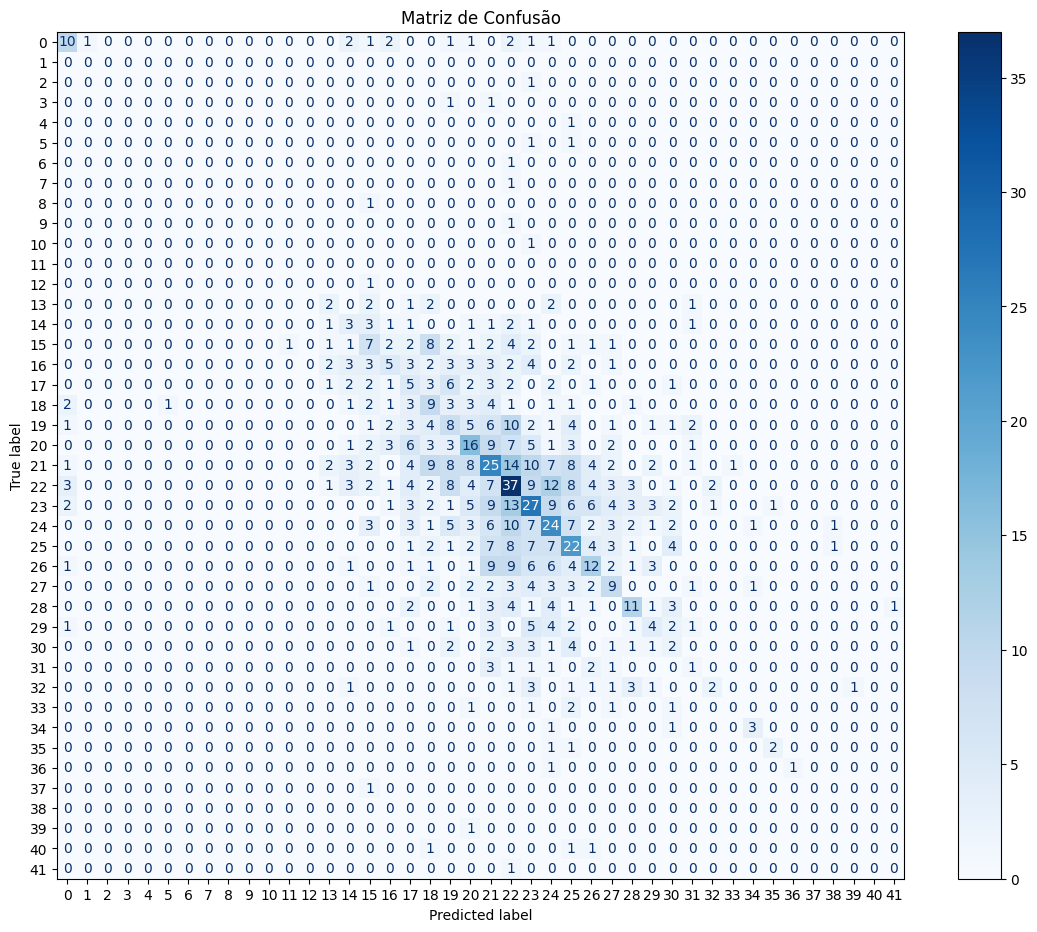

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMet

              precision    recall  f1-score   support

           0       0.48      0.45      0.47        22
           2       0.00      0.00      0.00         0
          23       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         2
          25       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         2
          27       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         1
          30       0.00      0.00      0.00         1
          31       0.00      0.00      0.00         1
          32       0.00      0.00      0.00         0
          34       0.00      0.00      0.00         1
          35       0.20      0.20      0.20        10
          36       0.14      0.20      0.17        15
          37       0.21      0.19      0.20        36
          38       0.25      0.14      0.18        36
          39       0.12    

In [ ]:
# fig2_name = "images/matrix/MATRIX2(POPULARITY)_" + get_date_time_now() + '.png'

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(14, 11))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title('Matriz de Confusão')
# plt.savefig(fig2_name)
plt.show()

print(classification_report(y_test, y_pred))

# send_plot(webhook_url, fig2_name, 'Matrix de Confusão Popularidade 2 - ' + get_date_time_now())

# Permutação e análise das features

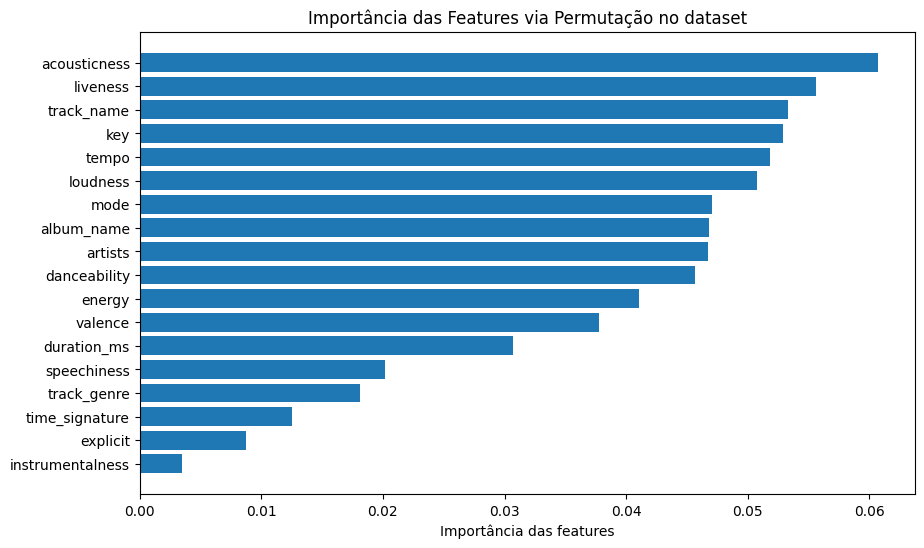

Plot enviado com sucesso!


In [ ]:
# fig3_name = "images/features/FEATURES(POPULARITY)_" + get_date_time_now() + '.png'


result = permutation_importance(best_svm, X_test_scaled, y_test, n_repeats=10, random_state=42)
sorted_idx = result.importances_mean.argsort()
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), result.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [X.columns[i] for i in sorted_idx])
plt.xlabel('Importância das features')
plt.title('Importância das Features via Permutação no dataset')
# plt.savefig(fig3_name)
plt.show()

# send_plot(webhook_url, fig3_name, 'Análise de features POPULARIDADE - ' + get_date_time_now())

In [ ]:
fp_indices = np.where((y_pred == 1) & (y_test != 1))[0]
fn_indices = np.where((y_pred != 1) & (y_test == 1))[0]
fp_samples = X_test.iloc[fp_indices]
fn_samples = X_test.iloc[fn_indices]
correctly_classified_samples = X_test[(y_pred == y_test)]
fp_mean = fp_samples.mean()
fn_mean = fn_samples.mean()
correctly_classified_mean = correctly_classified_samples.mean()
comparison_df = pd.DataFrame({
    'Falsos positivos': fp_mean,
    'Falsos Negativos': fn_mean,
    'Classificados corretamente': correctly_classified_mean
})
print('Comparação das Features (Médias):')
print(comparison_df)

Comparação das Features (Médias):
                  Falsos positivos  Falsos Negativos  \
artists                        NaN               NaN   
album_name                     NaN               NaN   
track_name                     NaN               NaN   
duration_ms                    NaN               NaN   
explicit                       NaN               NaN   
danceability                   NaN               NaN   
energy                         NaN               NaN   
key                            NaN               NaN   
loudness                       NaN               NaN   
mode                           NaN               NaN   
speechiness                    NaN               NaN   
acousticness                   NaN               NaN   
instrumentalness               NaN               NaN   
liveness                       NaN               NaN   
valence                        NaN               NaN   
tempo                          NaN               NaN   
time_signature